In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup forking to the HTTPS  talserver
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# try: 
#     os.mkdir('img_align_celeba')

#     # Now perform the following 100 times:
#     for img_i in range(1, 101):

#         # create a string using the current loop counter
#         f = '000%03d.jpg' % img_i

#         # and get the url with that string appended the end
#         url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

#         # We'll print this out to the console so we can see how far we've gone
#         print(url, end='\r')

#         # And now download the url to a location inside our new directory
#         urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
# except:
#     #os.rm('img_align_celeba')
#     print("You may need to delete the existing 'img_align_celeba' folder in your directory")

try:
    os.mkdir('img_align_local')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # specify the path to the local image file
        path = '/Users/xuxuqian/Desktop/pics/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(path, end='\r')

        # copy the image file to a location inside our new directory
        shutil.copy(path, os.path.join('img_align_local', f))
except:
    #os.rm('img_align_local')
    print("You may need to delete the existing 'img_align_local' folder in your directory")


You may need to delete the existing 'img_align_local' folder in your directory


In [12]:
# specify the directory path
directory = '/Users/xuxuqian/Desktop/pics/'

# get a list of all image files in the directory
files = [os.path.join(directory, file_i)
         for file_i in os.listdir(directory)
         if file_i.endswith('.jpg') or file_i.endswith('.png')]

# sort the list of image files alphabetically
files = sorted(files)

# check the number of image files
print(f"Number of image files: {len(files)}")

import matplotlib.pyplot as plt
import numpy as np

print(os.path.join(directory, files[90]))
img = plt.imread(os.path.join(directory, files[90]))

print(img)


Number of image files: 4319
/Users/xuxuqian/Desktop/pics/00000013_(3).jpg
[[[146 147 129]
  [145 146 128]
  [145 146 128]
  ...
  [173 185 161]
  [173 185 161]
  [173 185 161]]

 [[145 146 128]
  [145 146 128]
  [144 145 127]
  ...
  [174 186 162]
  [173 185 161]
  [173 185 161]]

 [[145 146 128]
  [144 145 127]
  [144 145 127]
  ...
  [174 186 162]
  [174 186 162]
  [173 185 161]]

 ...

 [[ 15  16  18]
  [ 15  16  18]
  [ 15  16  18]
  ...
  [ 50  56  46]
  [ 52  58  48]
  [ 53  59  49]]

 [[ 14  15  17]
  [ 14  15  17]
  [ 14  15  17]
  ...
  [ 49  55  45]
  [ 50  56  46]
  [ 51  57  47]]

 [[ 14  15  17]
  [ 14  15  17]
  [ 14  15  17]
  ...
  [ 48  54  44]
  [ 48  54  44]
  [ 48  54  44]]]


In [5]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

NameError: name 'img' is not defined

In [6]:
img.shape
# (218, 178, 3)

NameError: name 'img' is not defined

In [15]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]
imgs[90].shape

(800, 800, 3)

In [16]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(100,)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


/var/folders/y7/m8ldbqgx5b37x4j00mjx6px80000gn/T/ipykernel_5925/322644463.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(imgs) # make 'data' = our numpy array


In [17]:
t=img.copy()
red=img.copy()
green=img.copy()
blue=img.copy()
red[:,:,1:3]=0
green[:,:,::2]=0
blue[:,:,:2]=0
fig,ax=plt.subplots(2,2)
fig.set_size_inches(218,178)
ax[0,0].imshow(img)
ax[0,1].imshow(red)
ax[1,0].imshow(green)
ax[1,1].imshow(blue)

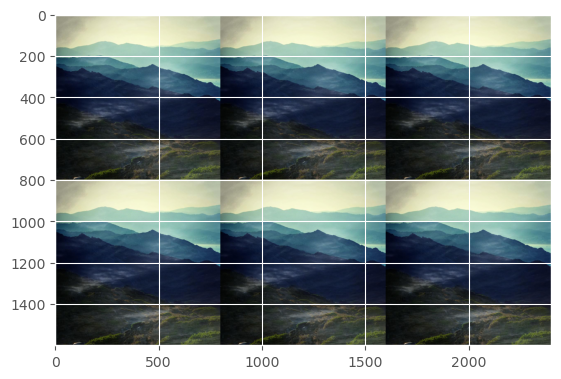

In [18]:
t=img.copy()
# r=np.concatenate((t,t,t),axis=1)
# r=np.concatenate((t,t),axis=0)

# 先水平方向两次，再垂直方向3次
r1=np.concatenate((t,t,t),axis=1)
r2=np.concatenate((r1,r1),axis=0)
plt.imshow(r2)
